Import packages.

In [2]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [3]:
X, y, _, names, _ = read_design_space('../../final_result_impl_matrixmul.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

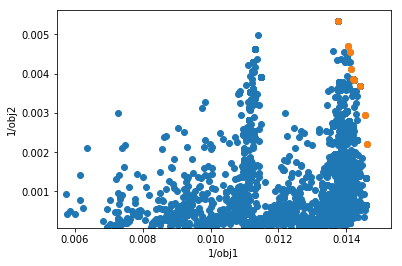

In [4]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


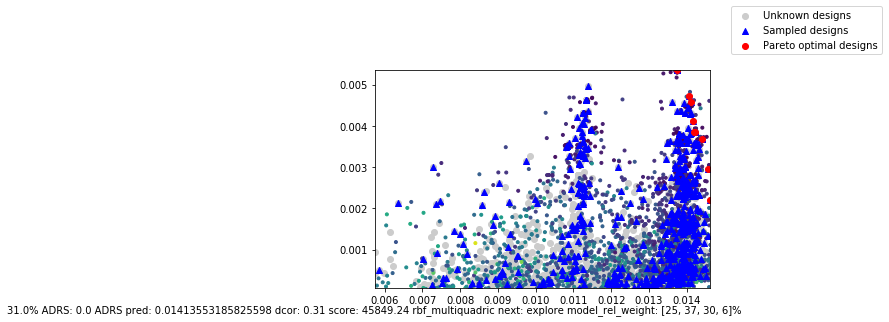

In [5]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [6]:
sherlock.known_idx

array([ 923, 1060, 1698, 2071, 1115,    0,    1,    8,  327,    3, 1923,
          7,    2, 1979,    6,   66, 1978, 2236, 1541, 1939, 1920,  775,
       1549, 1548, 1540, 1546, 1159,  774,  773,  837,  772,  771,  770,
        769,  768, 1152,  779,  901,  834,  781,    4,  836,  384,  390,
        388,  391,  385, 1796, 1156,  782,  386,  778, 2172,  387,  838,
        389,  312,  832,  320,  448,  449, 1216,    5,   64,  833,  839,
        456,  840,   71,  454, 1153,   70,  776,  835, 1221,  777,  450,
        704, 1088, 1089,  640, 1024,  512,  256,  576,  896,  960,  648,
       1280, 1344, 1407, 1471,  846, 1154, 1916,  130,   69,   75,   67,
         10,   68, 1157, 1096,   65,  321, 1869,  257,  128,  136,  192,
        129, 1158,    9,  200,   14,   12,  780, 1155, 1162,  396,  395,
       1534,  394,  397,  393,  392,  399,  398, 1408,   15, 1845,  783,
        520,  584,  842,  455,  451,  585,  712,  968,   13,  453, 1789,
       1726,   11,  193,   73, 1536, 1598,  784,  4